In [1]:
from mesh_library import *

In [ ]:
#meshio.write("mesh.msh", mesh, file_format="gmsh22")

In [22]:
def shift_surface(mesh : meshio.Mesh, func_before : callable, func_after : callable) -> meshio.Mesh:
    line_clasifications = mesh.cell_data_dict["gmsh:physical"]["line"]
    airfoil_lines = mesh.cells_dict["line"][np.where(line_clasifications == 5)[0]]
    airfoil_points = np.unique(airfoil_lines)

    
    original_point = mesh.points
    point = original_point.copy()
    func_before = np.vectorize(func_before)
    func_after = np.vectorize(func_after)

    min_point_val = np.min(point[:,1])
    point[:,1] -= min_point_val
    max_index = np.argmax(point[:,1])
    scaling_value = point[max_index,1] / func_before(point[max_index,0])
    point[:,1] *= scaling_value
    point[:,1] = point[:,1] / func_before(point[:,0]) * func_after(point[:,0])
    point[:,1] /= scaling_value
    point[:,1] += min_point_val
    point[airfoil_points] = original_point[airfoil_points]
    mesh.points = point

    return mesh

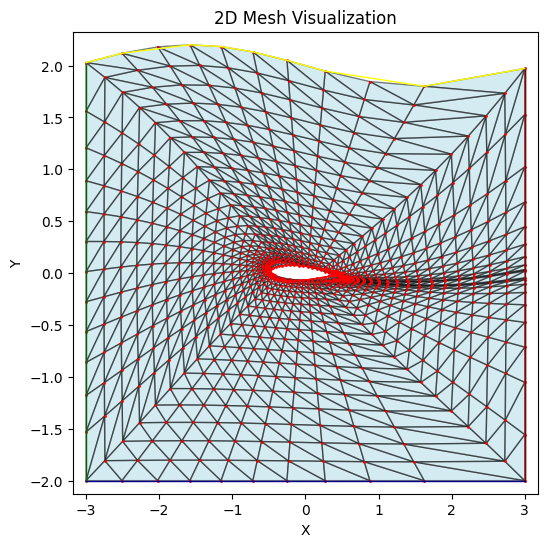

In [23]:
mesh = NACA_mesh(50,20,"0015", "triangle", angle_of_attack=0)
plot_mesh(shift_surface(mesh, lambda x:2, lambda x:2 - 0.1*np.sin(x)))

In [10]:
len(np.where(np.array([1,2,3]) == 4)[0])

0

In [11]:
mesh = meshio.read("naca0012_alpha5_meshNEW.msh")

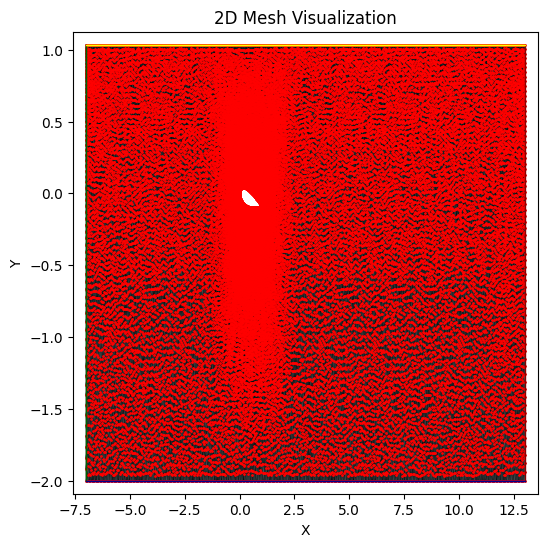

In [12]:
plot_mesh(mesh)